In [1]:
import os
print(os.getcwd())
if os.getcwd().endswith("tabular_data"):
    os.chdir("..")
    os.chdir("..")
print(os.getcwd())
from src.modelling import DeepModel_Trainer
from src.augmentation import Transformer,None_Transform
from src.data_modules import DataModule,ImagesDataset
from torch import nn
import torch
from torchvision import transforms,models
import nibabel as nib
import numpy as np
from src.evaluation import Evaluation
import os, sys
sys.path.insert(0, '..')
import numpy as np
from models.NODE import arch,odst,nn_utils
import torch, torch.nn as nn

c:\Users\j\gitlab\pro5d-classification-prolactinoma\modelling\tabular_data
c:\Users\j\gitlab\pro5d-classification-prolactinoma


## NODE

In [2]:
%env "WANDB_NOTEBOOK_NAME" "baseline"
%env WANDB_SILENT=True

base_transformer = Transformer(
    None_Transform(), "standard"
)



def shallow_NODE():
    model = nn.Sequential(
    arch.DenseBlock(4, 2048, num_layers=1, tree_dim=3, depth=6, flatten_output=False,
                   choice_function=nn_utils.entmax15, bin_function=nn_utils.entmoid15),
    nn_utils.Lambda(lambda x: x[..., 0].mean(dim=-1)),  # average first channels of every tree
    )
    return model

env: "WANDB_NOTEBOOK_NAME"="baseline"
env: WANDB_SILENT=True


In [3]:
# deep network # TODO nachschauen ob mehr Daten benötigt sein könnten.
# model = nn.Sequential(
#     arch.DenseBlock(4, 128, num_layers=8, tree_dim=3, depth=6, flatten_output=False,
#                    choice_function=nn_utils.entmax15, bin_function=nn_utils.entmoid15),
#     nn_utils.Lambda(lambda x: x[..., 0].mean(dim=-1)),  # average first channels of every tree
    
# )

In [4]:
data_module = DataModule(base_transformer,use_mri_images=False,use_tabular_data=True,columns_tab_data=["COR60","FSH","FT4","IGF1"])

Fold-Iteration:   0%|          | 0/5 [00:00<?, ?fold/s]

{'index_batch': 1, 'epoch': 0, 'loss batch': tensor(0.6919, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 2, 'epoch': 0, 'loss batch': tensor(0.6897, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 3, 'epoch': 0, 'loss batch': tensor(0.6861, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 4, 'epoch': 0, 'loss batch': tensor(0.6812, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 5, 'epoch': 0, 'loss batch': tensor(0.6870, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 6, 'epoch': 0, 'loss batch': tensor(0.6788, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 7, 'epoch': 0, 'loss batch': tensor(0.6801, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 8, 'epoch': 0, 'loss batch': tensor(0.6832, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 9, 'epoch': 0, 'loss batch': tensor(0.6709, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 10, 'epoch': 0, 'loss batch': tensor(0.6745, grad_fn=<BinaryCrossEntropyBackward0>)}

Epoch-Iteration: 100%|██████████| 1/1 [00:04<00:00,  4.36s/epoch]

{'epoch': 0, 'Loss train': 0.664524931460619, 'Loss test': tensor(0.6283, dtype=torch.float64), 'sensitivity_test': 0.0, 'specificity_test': 1.0, 'auc_test': 0.7789855072463768, 'sensitivity_train': 0.0, 'specificity_train': 1.0, 'auc_train': 0.5}


{'sensitivity test': 0.0, 'specificity test': 1.0, 'auc test': 0.7789855072463768}


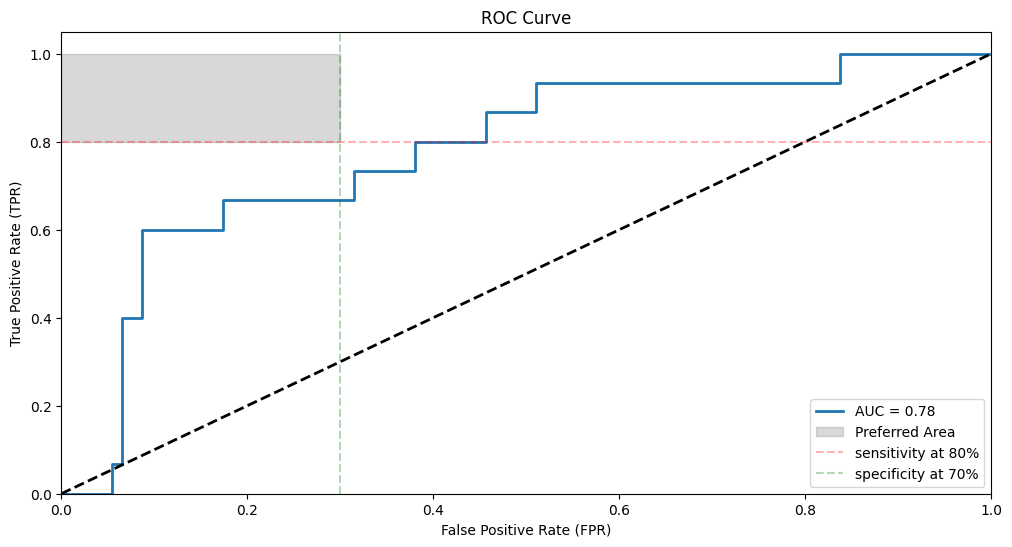

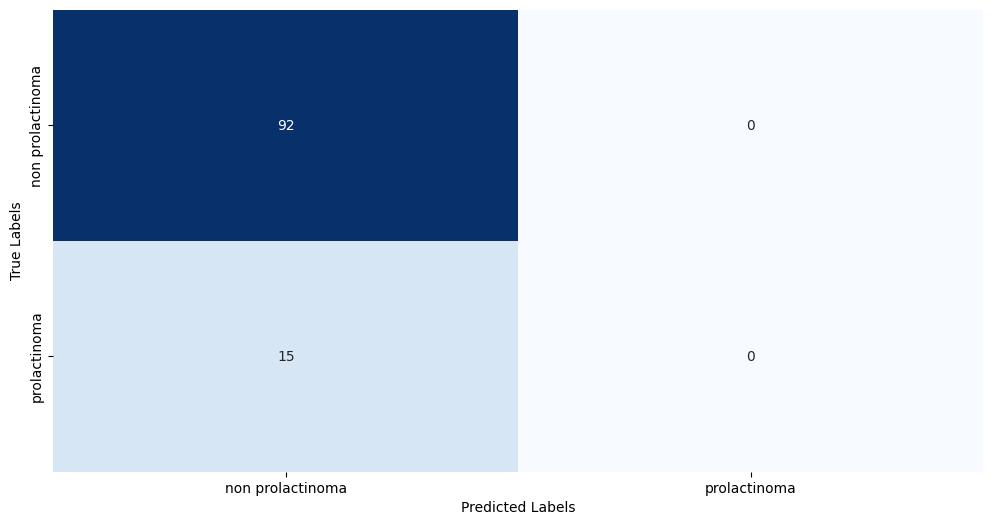

Fold-Iteration:  20%|██        | 1/5 [00:05<00:20,  5.03s/fold]

{'index false positiv test': array([], dtype=int64), 'index false negativ test': array([5, 6, 7, 8, 9]), 'index true positiv test': array([], dtype=int64), 'index true negativ test': array([0, 1, 2, 3, 4])}


{'index_batch': 1, 'epoch': 0, 'loss batch': tensor(0.6912, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 2, 'epoch': 0, 'loss batch': tensor(0.6834, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 3, 'epoch': 0, 'loss batch': tensor(0.6851, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 4, 'epoch': 0, 'loss batch': tensor(0.6907, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 5, 'epoch': 0, 'loss batch': tensor(0.6869, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 6, 'epoch': 0, 'loss batch': tensor(0.6774, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 7, 'epoch': 0, 'loss batch': tensor(0.6729, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 8, 'epoch': 0, 'loss batch': tensor(0.6687, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 9, 'epoch': 0, 'loss batch': tensor(0.6751, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 10, 'epoch': 0, 'loss batch': tensor(0.6699, grad_fn=<BinaryCrossEntropyBackward0>)}

Epoch-Iteration: 100%|██████████| 1/1 [00:05<00:00,  5.20s/epoch]

{'epoch': 0, 'Loss train': 0.6561142350688125, 'Loss test': tensor(0.6081, dtype=torch.float64), 'sensitivity_test': 0.0, 'specificity_test': 1.0, 'auc_test': 0.7137681159420289, 'sensitivity_train': 0.0, 'specificity_train': 1.0, 'auc_train': 0.5}


{'sensitivity test': 0.0, 'specificity test': 1.0, 'auc test': 0.7137681159420289}


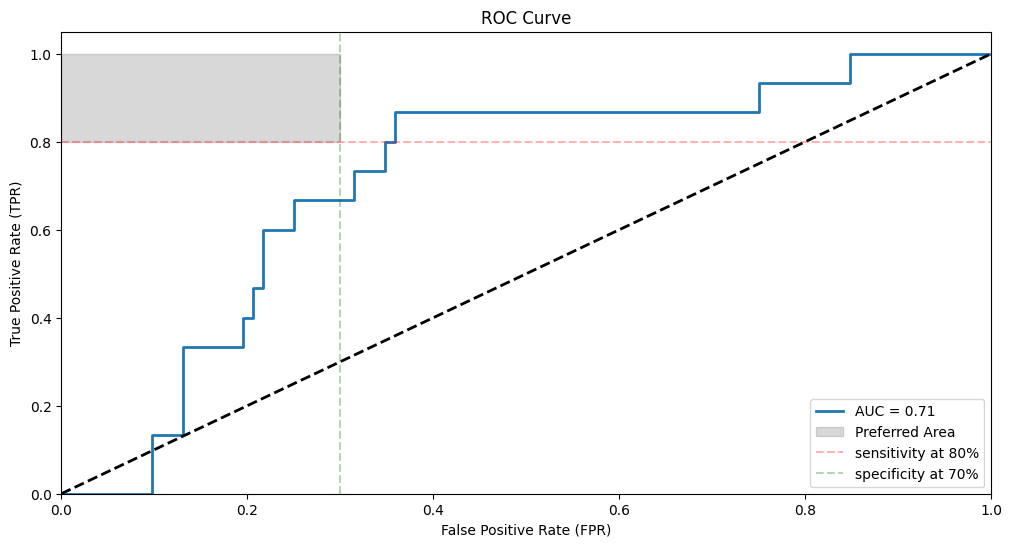

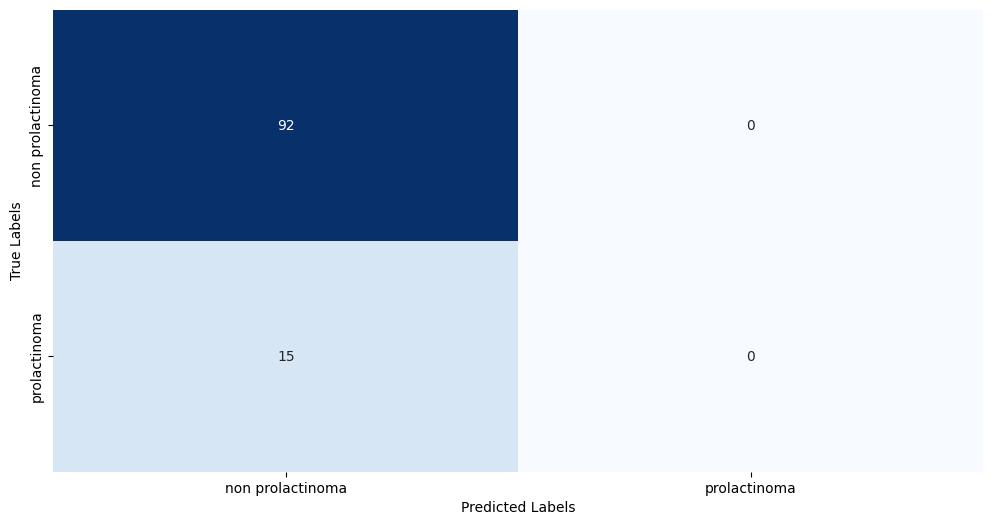

Fold-Iteration:  40%|████      | 2/5 [00:10<00:16,  5.44s/fold]

{'index false positiv test': array([], dtype=int64), 'index false negativ test': array([5, 6, 7, 8, 9]), 'index true positiv test': array([], dtype=int64), 'index true negativ test': array([0, 1, 2, 3, 4])}


{'index_batch': 1, 'epoch': 0, 'loss batch': tensor(0.6927, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 2, 'epoch': 0, 'loss batch': tensor(0.6937, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 3, 'epoch': 0, 'loss batch': tensor(0.6912, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 4, 'epoch': 0, 'loss batch': tensor(0.6873, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 5, 'epoch': 0, 'loss batch': tensor(0.6843, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 6, 'epoch': 0, 'loss batch': tensor(0.6874, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 7, 'epoch': 0, 'loss batch': tensor(0.6799, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 8, 'epoch': 0, 'loss batch': tensor(0.6782, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 9, 'epoch': 0, 'loss batch': tensor(0.6833, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 10, 'epoch': 0, 'loss batch': tensor(0.6837, grad_fn=<BinaryCrossEntropyBackward0>)}

Epoch-Iteration: 100%|██████████| 1/1 [00:05<00:00,  5.19s/epoch]

{'epoch': 0, 'Loss train': 0.6610526514775825, 'Loss test': tensor(0.6172, dtype=torch.float64), 'sensitivity_test': 0.0, 'specificity_test': 1.0, 'auc_test': 0.7427536231884059, 'sensitivity_train': 0.07936507936507936, 'specificity_train': 0.9496124031007752, 'auc_train': 0.5144887412329272}


{'sensitivity test': 0.0, 'specificity test': 1.0, 'auc test': 0.7427536231884059}


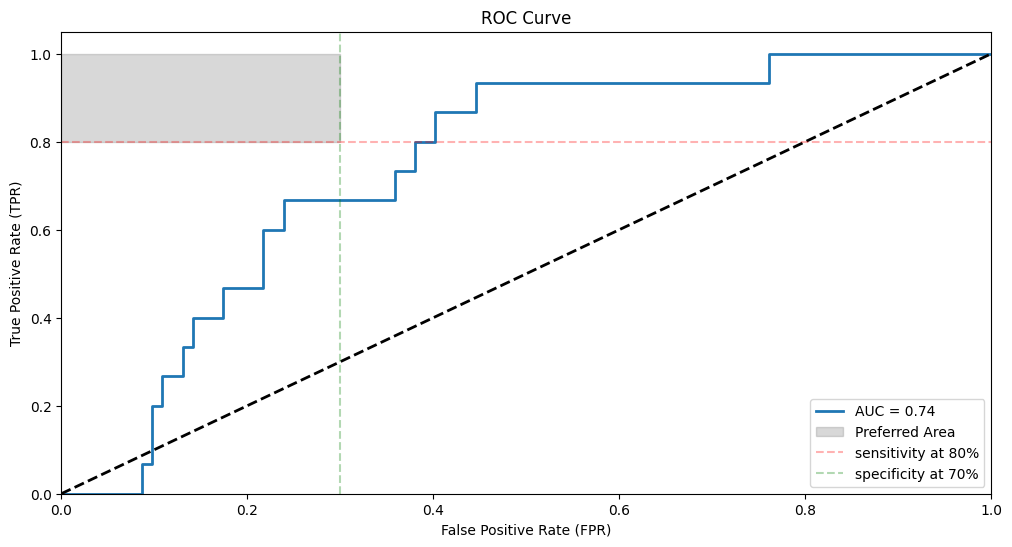

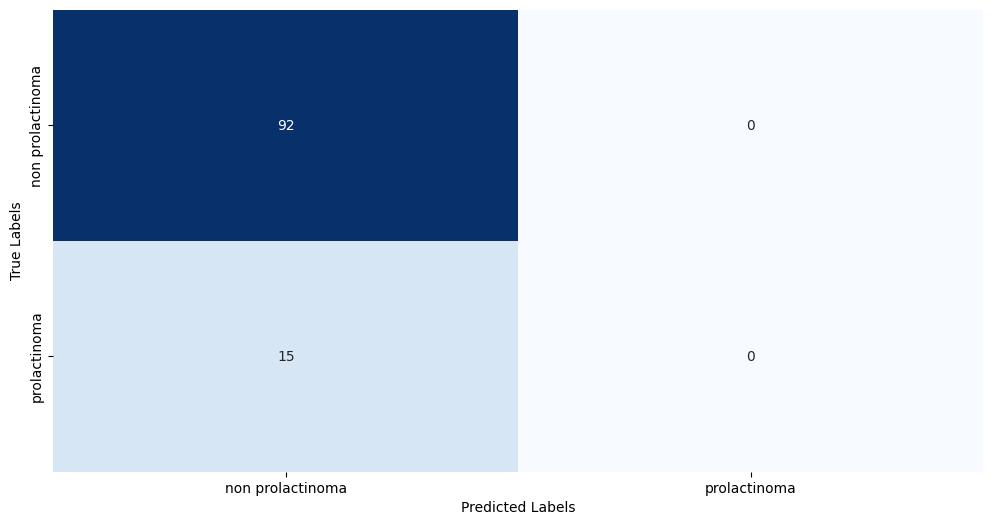

Fold-Iteration:  60%|██████    | 3/5 [00:16<00:11,  5.58s/fold]

{'index false positiv test': array([], dtype=int64), 'index false negativ test': array([5, 6, 7, 8, 9]), 'index true positiv test': array([], dtype=int64), 'index true negativ test': array([0, 1, 2, 3, 4])}


{'index_batch': 1, 'epoch': 0, 'loss batch': tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 2, 'epoch': 0, 'loss batch': tensor(0.6927, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 3, 'epoch': 0, 'loss batch': tensor(0.6895, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 4, 'epoch': 0, 'loss batch': tensor(0.6881, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 5, 'epoch': 0, 'loss batch': tensor(0.6787, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 6, 'epoch': 0, 'loss batch': tensor(0.6876, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 7, 'epoch': 0, 'loss batch': tensor(0.6842, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 8, 'epoch': 0, 'loss batch': tensor(0.6778, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 9, 'epoch': 0, 'loss batch': tensor(0.6635, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 10, 'epoch': 0, 'loss batch': tensor(0.6788, grad_fn=<BinaryCrossEntropyBackward0>)}

Epoch-Iteration: 100%|██████████| 1/1 [00:05<00:00,  5.36s/epoch]

{'epoch': 0, 'Loss train': 0.6556021553097349, 'Loss test': tensor(0.6066, dtype=torch.float64), 'sensitivity_test': 0.0, 'specificity_test': 1.0, 'auc_test': 0.7565217391304347, 'sensitivity_train': 0.016129032258064516, 'specificity_train': 0.9768339768339769, 'auc_train': 0.4964815045460207}


{'sensitivity test': 0.0, 'specificity test': 1.0, 'auc test': 0.7565217391304347}


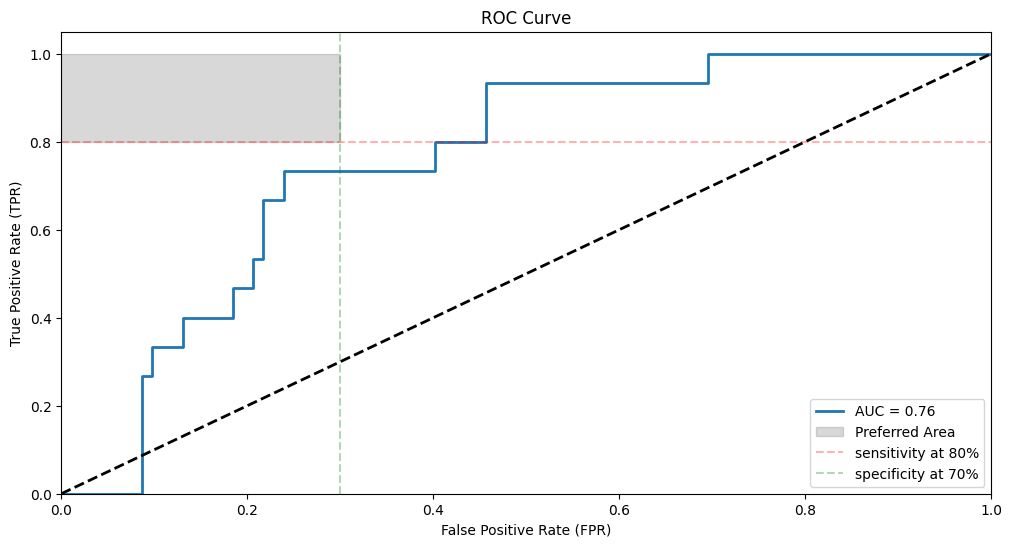

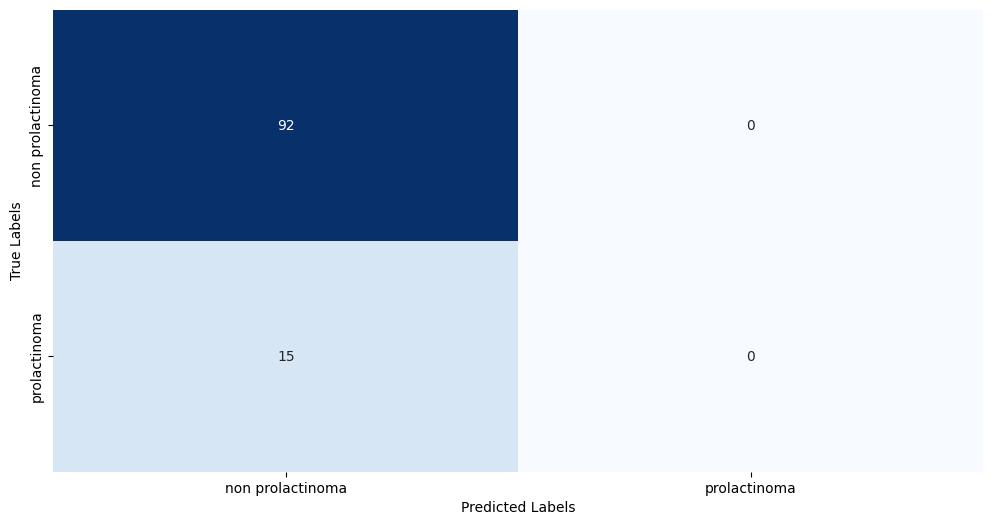

Fold-Iteration:  80%|████████  | 4/5 [00:22<00:05,  5.70s/fold]

{'index false positiv test': array([], dtype=int64), 'index false negativ test': array([5, 6, 7, 8, 9]), 'index true positiv test': array([], dtype=int64), 'index true negativ test': array([0, 1, 2, 3, 4])}


{'index_batch': 1, 'epoch': 0, 'loss batch': tensor(0.6923, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 2, 'epoch': 0, 'loss batch': tensor(0.6915, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 3, 'epoch': 0, 'loss batch': tensor(0.6885, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 4, 'epoch': 0, 'loss batch': tensor(0.6852, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 5, 'epoch': 0, 'loss batch': tensor(0.6871, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 6, 'epoch': 0, 'loss batch': tensor(0.6872, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 7, 'epoch': 0, 'loss batch': tensor(0.6861, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 8, 'epoch': 0, 'loss batch': tensor(0.6852, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 9, 'epoch': 0, 'loss batch': tensor(0.6765, grad_fn=<BinaryCrossEntropyBackward0>)}
{'index_batch': 10, 'epoch': 0, 'loss batch': tensor(0.6726, grad_fn=<BinaryCrossEntropyBackward0>)}

Epoch-Iteration: 100%|██████████| 1/1 [00:04<00:00,  4.34s/epoch]

{'epoch': 0, 'Loss train': 0.6672949267156196, 'Loss test': tensor(0.6311, dtype=torch.float64), 'sensitivity_test': 0.0, 'specificity_test': 1.0, 'auc_test': 0.7601449275362319, 'sensitivity_train': 0.03225806451612903, 'specificity_train': 0.9884169884169884, 'auc_train': 0.5103375264665587}


{'sensitivity test': 0.0, 'specificity test': 1.0, 'auc test': 0.7601449275362319}


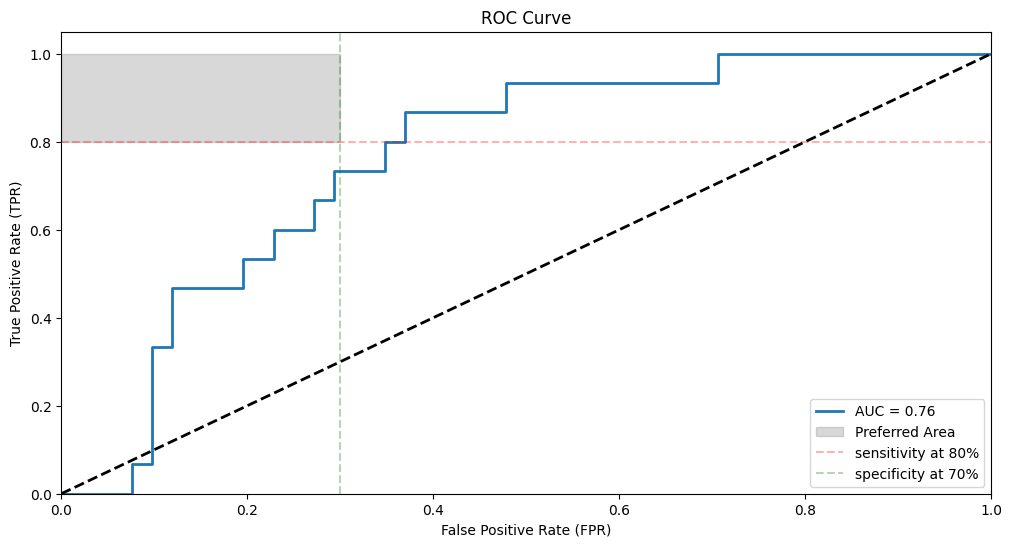

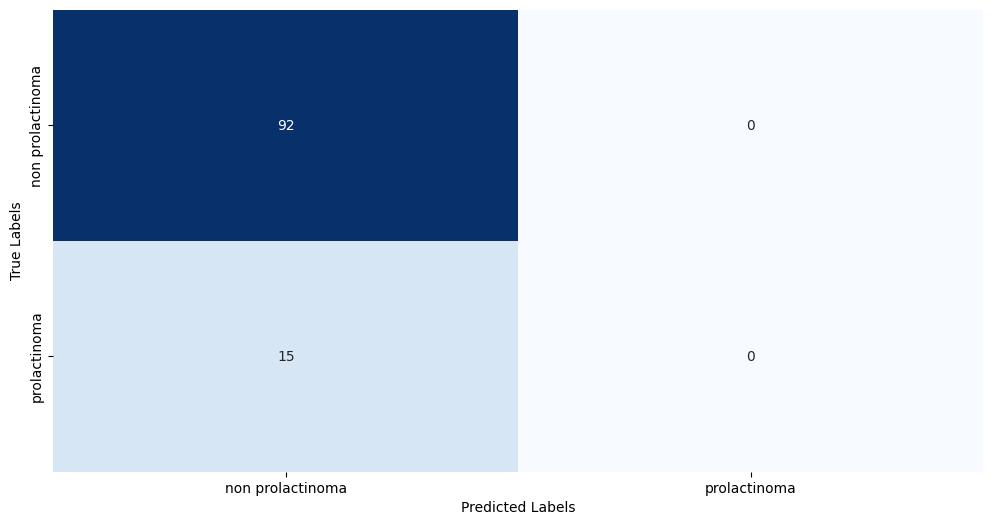

Fold-Iteration: 100%|██████████| 5/5 [00:27<00:00,  5.46s/fold]

{'index false positiv test': array([], dtype=int64), 'index false negativ test': array([5, 6, 7, 8, 9]), 'index true positiv test': array([], dtype=int64), 'index true negativ test': array([0, 1, 2, 3, 4])}


In [5]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    data_module = DataModule(base_transformer,use_mri_images=False,use_tabular_data=True,columns_tab_data=["COR60","FSH","FT4","IGF1"])
    NODE = DeepModel_Trainer(data_module, shallow_NODE)
    NODE.train_model("NODE", "shallow", num_epochs=1, test_model=False,batchsize_train_data=10,use_mri_images=False,use_tabular_data=True,num_workers=0,
                        save_model=False,
                        cross_validation=True,lr=0.005,evaluate_test_set=True)